# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [1]:
# importar librerías

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv') #completa el código
usage = pd.read_csv('/datasets/usage.csv') #completa el código

In [3]:
# mostrar las primeras 5 filas de plans
pd.read_csv('/datasets/plans.csv').head(5)


,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [4]:
# mostrar las primeras 5 filas de users
pd.read_csv('/datasets/users_latam.csv').head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [5]:
# mostrar las primeras 5 filas de usage
pd.read_csv('/datasets/usage.csv').head(5)

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [6]:
# revisar el número de filas y columnas de cada dataset
print(pd.read_csv('/datasets/plans.csv').shape)
print(pd.read_csv('/datasets/users_latam.csv').shape)
print(pd.read_csv('/datasets/usage.csv').shape)

(2, 8)
(4000, 8)
(40000, 6)


In [7]:
# inspección de plans con .info()
pd.read_csv('/datasets/plans.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [8]:
# inspección de users con .info()
pd.read_csv('/datasets/users_latam.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [9]:
# inspección de usage con .info()
pd.read_csv('/datasets/usage.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [10]:
# cantidad de nulos para users
print(pd.read_csv('/datasets/users_latam.csv').isnull().sum())# Cantidad de valores nulos)

user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64


In [11]:
# cantidad de nulos para usage
print(pd.read_csv('/datasets/usage.csv').isnull().sum())

id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?  
- Indica qué harías: ¿imputar, eliminar, ignorar?

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [12]:
# explorar columnas numéricas de users
import pandas as pd 
users_latam= pd.read_csv('/datasets/users_latam.csv')

print("Información del dataset:")
print(users_latam.info())
print("\nPrimeras filas:")
print(users_latam.head())
print("\nTipos de datos actuales:")
print(users_latam.dtypes)

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB
None

Primeras filas:
   user_id first_name last_name  age      city                       reg_date  \
0    10000     Carlos    Garcia   38  Medellín  2022-01-01 00:00:00.000000000   
1    10001      Mateo    Torres   53         ?  2022-01-01 06:34:17.914478619   
2    10002      Sofia   Ramirez   57      CDMX  2022-01-01 13:08:35.828957239   
3    10003      Mateo   Ramirez   69    Bogotá  2022-01-01 19:42:53.743

- La columna `user_id` es un dato de tipo numérico
- La columna `age` tien un formato de tipo numérico.

In [13]:
# explorar columnas numéricas de usage
import pandas as pd 
usage= pd.read_csv('/datasets/usage.csv')

print("Información del dataset:")
print(usage.info())
print("\nPrimeras filas:")
print(usage.head())
print("\nTipos de datos actuales:")
print(usage.dtypes)


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB
None

Primeras filas:
   id  user_id  type                           date  duration  length
0   1    10332  call  2024-01-01 00:00:00.000000000      0.09     NaN
1   2    11458  text  2024-01-01 00:06:30.969774244       NaN    39.0
2   3    11777  text  2024-01-01 00:13:01.939548488       NaN    36.0
3   4    10682  call  2024-01-01 00:19:32.909322733      1.53     NaN
4   5    12742  call  2024-01-01 00:26:03.879096977      4.84     NaN

Tipos de datos actuales:
id            int64
user_

- Las columnas `id` y `user_id`tienen un formato de número entero.
- Las columnas type y date, tienen un formato de texto, mientras que las columnas duration, length tienen un formato de numéros decimales.

In [14]:
# explorar columnas categóricas de users
import pandas as pd
users_latam= pd.read_csv('/datasets/users_latam.csv')
columnas_user = ['city', 'plan']

# Frecuencia absoluta y relativa:
print("Frecuencia absoluta:")
print(users_latam[['city', 'plan']].value_counts())

print("\nFrecuencia relativa:")
print(users_latam[['city', 'plan']].value_counts(normalize=True))

Frecuencia absoluta:
city      plan   
Bogotá    Basico     522
CDMX      Basico     474
Medellín  Basico     398
GDL       Basico     298
Bogotá    Premium    286
MTY       Basico     275
Cali      Basico     262
CDMX      Premium    256
Medellín  Premium    218
Cali      Premium    162
GDL       Premium    152
MTY       Premium    132
?         Basico      65
          Premium     31
dtype: int64

Frecuencia relativa:
city      plan   
Bogotá    Basico     0.147833
CDMX      Basico     0.134240
Medellín  Basico     0.112716
GDL       Basico     0.084395
Bogotá    Premium    0.080997
MTY       Basico     0.077882
Cali      Basico     0.074200
CDMX      Premium    0.072501
Medellín  Premium    0.061739
Cali      Premium    0.045879
GDL       Premium    0.043047
MTY       Premium    0.037383
?         Basico     0.018408
          Premium    0.008779
dtype: float64


- La columna `city` tiene dos ciudades desconocidas en los últimos dos renglones.
- La columna `plan` incluye la categoría básico y premium.

In [15]:
# explorar columna categórica de usage
import pandas as pd
usage= pd.read_csv('/datasets/usage.csv')

# Frecuencia absoluta y relativa:
print("Frecuencia absoluta:")
print(usage[['type']].value_counts())

print("\nFrecuencia relativa:")
print(usage[['type']].value_counts(normalize=True))


Frecuencia absoluta:
type
text    22092
call    17908
dtype: int64

Frecuencia relativa:
type
text    0.5523
call    0.4477
dtype: float64


- La columna `type` contiene la categoría text los cuales tienen un formato de numéro entero y de numéro decimal.


---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?  En la columna age. 
- ¿Qué acción tomarías? Los reemplazaría por la mediana, para evitar que sesgen cualquier análisis estadístico.

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [16]:
# Convertir a fecha la columna `reg_date` de users
import pandas as pd
users_latam= pd.read_csv('/datasets/users_latam.csv')
users_latam['reg_date'] = pd.to_datetime(users_latam['reg_date'])

print(users_latam.info()) #para verificar que ahora sí tiene formato de fecha.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     4000 non-null   int64         
 1   first_name  4000 non-null   object        
 2   last_name   4000 non-null   object        
 3   age         4000 non-null   int64         
 4   city        3531 non-null   object        
 5   reg_date    4000 non-null   datetime64[ns]
 6   plan        4000 non-null   object        
 7   churn_date  466 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 250.1+ KB
None


In [17]:
# Convertir a fecha la columna `date` de usage
import pandas as pd
usage= pd.read_csv('/datasets/usage.csv')
usage['date'] = pd.to_datetime(usage['date'])

print(usage.info()) #para verificar que ahora sí tiene formato de fecha.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        40000 non-null  int64         
 1   user_id   40000 non-null  int64         
 2   type      40000 non-null  object        
 3   date      39950 non-null  datetime64[ns]
 4   duration  17924 non-null  float64       
 5   length    22104 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 1.8+ MB
None


In [18]:
# Revisar los años presentes en `reg_date` de users
users_latam['reg_date'].dt.year.agg(['min', 'max'])

min    2022
max    2026
Name: reg_date, dtype: int64

En `reg_date` tiene un formato de tipo numéro entero. Se observa que el año más antigüo es 2022 y el más reciente 2026.

In [19]:
# Revisar los años presentes en `date` de usage
usage['date'].dt.year.agg(['min', 'max'])


min    2024.0
max    2024.0
Name: date, dtype: float64

En `date`, muestra que el año más antigüo de uso es el año 2024 así como el año más actual. Su formato es de numéros decimales.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos) Hay registros de fechas futuras.
- ¿Qué harías con ellas? Los marcaría como nulos (NaT)

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [20]:
#Reemplazar -999 por la mediana de age.
#Calcular la mediana ignorando los valores -999.
#Usar loc para filtrar solo las edades válidas.
age_mediana= users_latam.loc[users_latam['age'] != -999, 'age'].median()

#Reemplazar los valores -999 por la mediana calculada.
users_latam['age'] = users_latam['age'].replace(-999, age_mediana) 

#Verificar cambios
users_latam['age'].describe()

count    4000.000000
mean       48.136000
std        17.689919
min        18.000000
25%        33.000000
50%        48.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [21]:
# Reemplazar ? por NA en city
import numpy as np
users_latam['city'] = users_latam['city'].replace('?', np.nan) 

# Verificar cambios
print("cuantos NAs hay ahora:", users_latam['city'].isna().sum())
print("Muestra valores únicos para confirmar que «?» ha desaparecido:", users_latam['city'].unique())


cuantos NAs hay ahora: 565
Muestra valores únicos para confirmar que «?» ha desaparecido: ['Medellín' nan 'CDMX' 'Bogotá' 'GDL' 'MTY' 'Cali']


In [22]:
# Marcar fechas futuras como NA para reg_date
import pandas as pd

# 1. Obtener la fecha actual.
today = pd.Timestamp.now()

# 2. Marcar como NaT las fechas que sean mayores a 'hoy'
# Usamos .loc para filtrar y asignar el valor nulo.
users_latam.loc[users_latam['reg_date'] > today, 'reg_date'] = pd.NaT

# Verificar cambios: buscar el valor máximo y contar nulos.
print(f"Fecha máxima detectada: {users_latam['reg_date'].max()}")
print(f"Cantidad de fechas futuras anuladas: {users_latam['reg_date'].isna().sum()}")


Fecha máxima detectada: 2024-12-31 00:00:00
Cantidad de fechas futuras anuladas: 40


### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [23]:
# Verificación MAR en usage (Missing At Random) para duration #usage= pd.read_csv('/datasets/usage.csv')
 #Crear indicadores de valores faltantes
usage['duration_is_missing'] = usage['duration'].isna()

# Verificar cuántos nulos tenemos
print("Nulos en duration:", usage['duration_is_missing'].sum())

#Analizar la relación con 'type'
#Ahora analicemos si los nulos dependen del tipo de usuario:
# Análisis para duration
print("=== ANÁLISIS DURATION ===")
duration_analysis = usage.groupby('type')['duration_is_missing'].agg(['count', 'sum', 'mean'])
duration_analysis.columns = ['total_users', 'missing_count', 'missing_rate']
print(duration_analysis)



Nulos en duration: 22076
=== ANÁLISIS DURATION ===
      total_users  missing_count  missing_rate
type                                          
call        17908              0      0.000000
text        22092          22076      0.999276


In [24]:
# Verificación MAR en usage (Missing At Random) para length
#Crear indicadores de valores faltantes
usage['length_is_missing'] = usage['length'].isna()

# Verificar cuántos nulos tenemos
print("Nulos en length:", usage['length_is_missing'].sum())

#Analizar la relación con 'type'
#Ahora analicemos si los nulos dependen del tipo de usuario:
# Análisis para duration
print("=== ANÁLISIS LENGTH ===")
length_analysis = usage.groupby('type')['length_is_missing'].agg(['count', 'sum', 'mean'])
length_analysis.columns = ['total_users', 'missing_count', 'missing_rate']
print(duration_analysis)

Nulos en length: 17896
=== ANÁLISIS LENGTH ===
      total_users  missing_count  missing_rate
type                                          
call        17908              0      0.000000
text        22092          22076      0.999276


Haz doble clic aquíy escribe que tu diagnostico de nulos en `duration` y `length`. Existe una relación entre la columna type y las variables duration y length. Call user, se conserva el 100% de los datos, por el contrario, para text hay un 99% de datos faltantes.

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [25]:

# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas

# Agrupar información por usuario
usage_agg = usage.groupby('user_id').agg({
    'is_text': 'sum',
    'is_call': 'sum',
    'duration': 'sum'
}).reset_index()

# observar resultado
usage_agg.head(3)


,user_id,is_text,is_call,duration
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [26]:
# Renombrar columnas
# Renombrar las columnas para mayor claridad
usage_agg.columns = ['user_id', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [27]:

# Combinar la tabla de usuarios con la tabla agregada de consumo
user_profile = users_latam.merge(usage_agg, on='user_id', how='left')

# Opcional: Llenar con 0 a los usuarios que no tuvieron actividad
cols_metrics = ['cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']
user_profile[cols_metrics] = user_profile[cols_metrics].fillna(0)

# Observar resultado
print(user_profile.head(5))


   user_id first_name last_name   age      city                      reg_date  \
0    10000     Carlos    Garcia  38.0  Medellín 2022-01-01 00:00:00.000000000   
1    10001      Mateo    Torres  53.0       NaN 2022-01-01 06:34:17.914478619   
2    10002      Sofia   Ramirez  57.0      CDMX 2022-01-01 13:08:35.828957239   
3    10003      Mateo   Ramirez  69.0    Bogotá 2022-01-01 19:42:53.743435858   
4    10004      Mateo    Torres  63.0       GDL 2022-01-02 02:17:11.657914478   

      plan churn_date  cant_mensajes  cant_llamadas  cant_minutos_llamada  
0   Basico        NaN            7.0            3.0                 23.70  
1   Basico        NaN            5.0           10.0                 33.18  
2   Basico        NaN            5.0            2.0                 10.74  
3  Premium        NaN           11.0            3.0                  8.99  
4   Basico        NaN            4.0            3.0                  8.01  


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [28]:
# Resumen estadístico de las columnas numéricas
# Identificar columnas numéricas en tu dataset
print("Columnas numéricas en usage:")
numeric_cols = usage.select_dtypes(include=['int64', 'float64']).columns
print(numeric_cols.tolist())


Columnas numéricas en usage:
['id', 'user_id', 'duration', 'length', 'is_text', 'is_call']


In [29]:
# Identificar columnas numéricas en tu dataset
print("Columnas numéricas en users_latam:")
numeric_cols = users_latam.select_dtypes(include=['int64', 'float64']).columns
print(numeric_cols.tolist())

Columnas numéricas en users_latam:
['user_id', 'age']


In [30]:
# Resumen estadístico de las columnas numérica
# Resumen más completo con percentiles
resumen_completo = users_latam.select_dtypes(include=['int64', 'float64']).agg([
    'count',
    'mean', 
    'median',
    'std',
    'min',
    lambda x: x.quantile(0.25),  # Percentil 25
    lambda x: x.quantile(0.75),  # Percentil 75
    'max'
])

# Renombrar las funciones lambda para que se vean mejor
resumen_completo.index = ['count', 'mean', 'median', 'std', 'min', 'Q1', 'Q3', 'max']
print("Resumen estadístico completo:")
print(resumen_completo.round(2))

Resumen estadístico completo:
         user_id      age
count    4000.00  4000.00
mean    11999.50    48.14
median  11999.50    48.00
std      1154.84    17.69
min     10000.00    18.00
Q1      10999.75    33.00
Q3      12999.25    63.00
max     13999.00    79.00


In [31]:
#Estadística de las columnas numéricas con .describe()
usage[['duration', 'length', 'is_text', 'is_call']].describe()

,duration,length,is_text,is_call
count,17924.000000,22104.000000,40000.000000,40000.000000
mean,5.202237,52.127398,0.552300,0.447700
std,6.842701,56.611183,0.497263,0.497263
min,0.000000,0.000000,0.000000,0.000000
25%,1.437500,37.000000,0.000000,0.000000
50%,3.500000,50.000000,1.000000,0.000000
75%,6.990000,64.000000,1.000000,1.000000
max,120.000000,1490.000000,1.000000,1.000000


In [32]:
#Hacer un merge entre el data de users_latam y usage.
df_unido = users_latam.merge(usage, on='user_id', how='left')  
#Hice otro merge con la tabla usage.agg porque ahí están las variables 'cant_mensajes', 'cant_llamdas'.
df_unido= usage_agg.merge(df_unido, on='user_id', how='right')

# Verificar el resultado
print(df_unido.head())

   user_id  cant_mensajes  cant_llamadas  cant_minutos_llamada first_name  \
0    10000            7.0            3.0                  23.7     Carlos   
1    10000            7.0            3.0                  23.7     Carlos   
2    10000            7.0            3.0                  23.7     Carlos   
3    10000            7.0            3.0                  23.7     Carlos   
4    10000            7.0            3.0                  23.7     Carlos   

  last_name   age      city   reg_date    plan churn_date       id  type  \
0    Garcia  38.0  Medellín 2022-01-01  Basico        NaN   6274.0  text   
1    Garcia  38.0  Medellín 2022-01-01  Basico        NaN  11903.0  call   
2    Garcia  38.0  Medellín 2022-01-01  Basico        NaN  16251.0  text   
3    Garcia  38.0  Medellín 2022-01-01  Basico        NaN  16549.0  call   
4    Garcia  38.0  Medellín 2022-01-01  Basico        NaN  22139.0  call   

                           date  duration  length duration_is_missing  \
0 2024-

In [33]:
#Usar .describre() para ver la información estadística de las columnas numéricas.
df_unido[['age', 'duration', 'length', 'is_text', 'is_call']].describe()

,age,duration,length,is_text,is_call
count,40001.000000,17924.000000,22104.000000,40000.000000,40000.000000
mean,48.149021,5.202237,52.127398,0.552300,0.447700
std,17.661031,6.842701,56.611183,0.497263,0.497263
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,1.437500,37.000000,0.000000,0.000000
50%,48.000000,3.500000,50.000000,1.000000,0.000000
75%,63.000000,6.990000,64.000000,1.000000,1.000000
max,79.000000,120.000000,1490.000000,1.000000,1.000000


In [34]:
# Distribución porcentual del tipo de plan
users_latam['plan'].value_counts(normalize=True) * 100


Basico     64.875
Premium    35.125
Name: plan, dtype: float64

---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

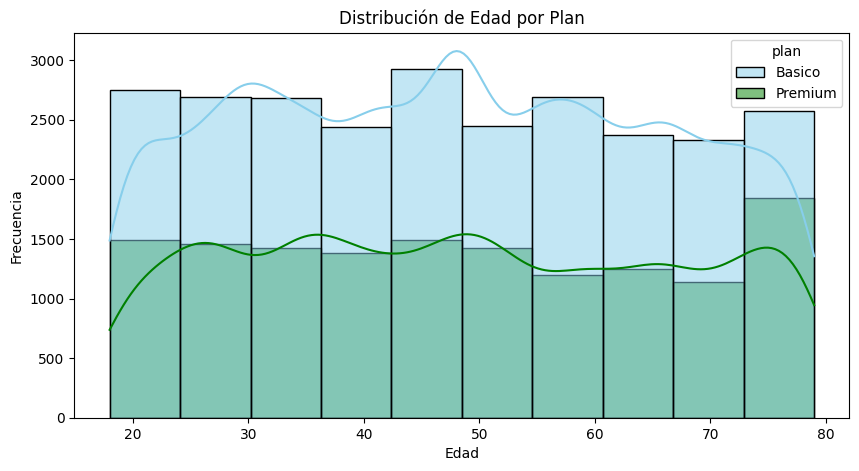

In [35]:
# Histograma para visualizar la edad (age)
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración estética general
#sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 5]
palette = ['skyblue', 'green']

sns.histplot(df_unido, x='age', hue='plan', kde=True, palette=palette, bins=10)
plt.title('Distribución de Edad por Plan')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

In [36]:
#Imprimir las primeras cinco filas para verificar que los merges se hicieron correctamente.
df_unido.head(5)


,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada,first_name,last_name,age,city,reg_date,plan,churn_date,id,type,date,duration,length,duration_is_missing,length_is_missing,is_text,is_call
0,10000,7.0,3.0,23.7,Carlos,Garcia,38.0,Medellín,2022-01-01,Basico,NaN,6274.0,text,2024-01-29 09:15:53.393834845,NaN,33.0,True,False,1.0,0.0
1,10000,7.0,3.0,23.7,Carlos,Garcia,38.0,Medellín,2022-01-01,Basico,NaN,11903.0,call,2024-02-23 20:35:22.253056326,7.40,NaN,False,True,0.0,1.0
2,10000,7.0,3.0,23.7,Carlos,Garcia,38.0,Medellín,2022-01-01,Basico,NaN,16251.0,text,2024-03-14 12:47:38.831470786,NaN,22.0,True,False,1.0,0.0
3,10000,7.0,3.0,23.7,Carlos,Garcia,38.0,Medellín,2022-01-01,Basico,NaN,16549.0,call,2024-03-15 21:09:27.824195604,5.84,NaN,False,True,0.0,1.0
4,10000,7.0,3.0,23.7,Carlos,Garcia,38.0,Medellín,2022-01-01,Basico,NaN,22139.0,call,2024-04-10 04:14:48.862221555,10.46,NaN,False,True,0.0,1.0


💡Insights: 
- Distribución se detecta un grupo que usa mucho texto pero pocas llamadas.
- Predominancia del Plan Básico: En todos los rangos de edad, el Plan Básico (azul claro) tiene una frecuencia significativamente mayor que el Plan Premium. Esto indica que es el producto principal de la compañía para cualquier generación.
- Distribución de Edad Uniforme: La distribución para ambos planes es notablemente plana y uniforme entre los 20 y los 70 años. No hay un "pico" generacional agresivo (como solo jóvenes o solo adultos mayores), lo que sugiere que el servicio tiene un atractivo generalizado.
- Pico de Adopción en Adultos: Existe un incremento visible en la frecuencia del Plan Básico cerca de los 45-50 años.
- Interés Premium en Adultos Mayores: Se observa un repunte interesante en el Plan Premium (verde) hacia los 75-80 años. Aunque la base de usuarios es menor en esa edad, una mayor proporción de ellos parece optar por el plan Premium comparado con otros rangos de edad.
- Simetría General: A diferencia de las métricas de consumo (mensajes o minutos), la edad no presenta un sesgo marcado. Es una distribución bastante equilibrada, lo que facilita el marketing masivo sin necesidad de una segmentación por edad extremadamente agresiva.

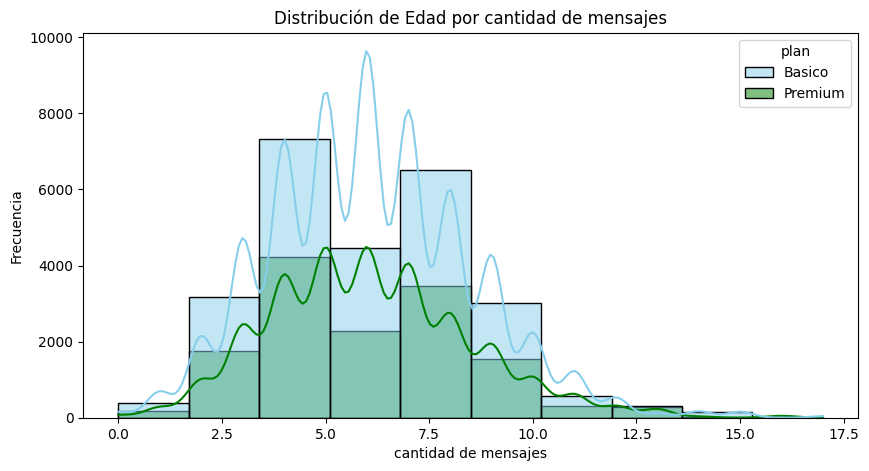

In [37]:
# Histograma para visualizar la cant_mensajes
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración estética general
#sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 5]
palette = ['skyblue', 'green']

sns.histplot(df_unido, x='cant_mensajes', hue='plan', kde=True, palette=palette, bins=10)
plt.title('Distribución de Edad por cantidad de mensajes')
plt.xlabel('cantidad de mensajes')
plt.ylabel('Frecuencia')
plt.show()


💡Insights: 
- 
- Dominio del Plan Básico: Los usuarios con el plan Básico (color azul claro) representan el mayor volumen de la muestra en todos los niveles de consumo.
- Comportamiento Multimodal: La distribución del plan Básico no es uniforme; presenta tres picos claros (modas) cerca de los 4, 6 y 8 mensajes
- Estabilidad en el Plan Premium: El plan Premium (color verde) muestra una distribución más "plana" y constante entre los 4 y 9 mensajes. No tiene picos de demanda tan agresivos como el plan Básico, lo que indica un consumo más regular y predecible.
- Sesgo a la Derecha: La gráfica presenta una asimetría positiva (sesgo a la derecha). La mayoría de los usuarios se concentran en el rango de 2.5 a 10 mensajes, con una "cola" larga de usuarios poco frecuentes hacia el extremo derecho.


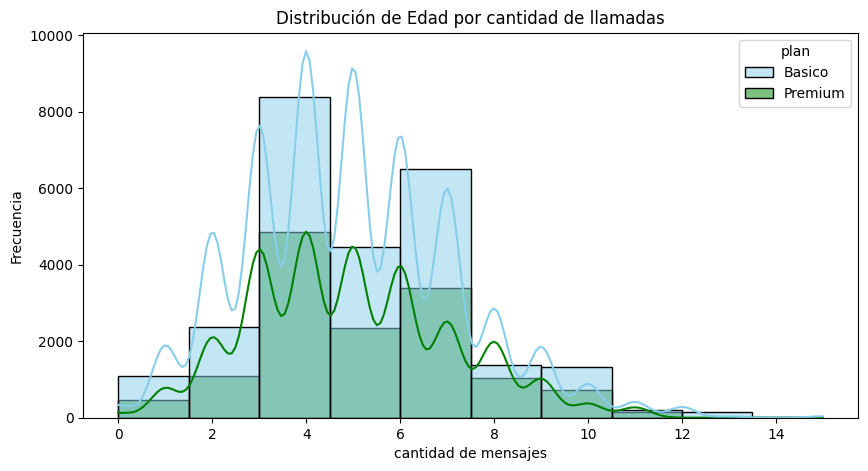

In [38]:
# Histograma para visualizar la cant_llamadas
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración estética general
#sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 5]
palette = ['skyblue', 'green']

sns.histplot(df_unido, x='cant_llamadas', hue='plan', kde=True, palette=palette, bins=10)
plt.title('Distribución de Edad por cantidad de llamadas')
plt.xlabel('cantidad de mensajes')
plt.ylabel('Frecuencia')
plt.show()


💡Insights: 

- Distribución y Sesgo: Ambas distribuciones están sesgadas a la derecha (asimetría positiva). El volumen de usuarios cae drásticamente después de los 10 mensajes, lo que indica que hay muy pocos "heavy users" de mensajería de texto en ConnectaTel.
-Los usuarios con el plan Básico (barras celestes) son significativamente más numerosos en casi todos los niveles de consumo de mensajes que los usuarios Premium.
-Picos de Consumo: Existe una tendencia bimodal clara. El pico principal de actividad ocurre entre los 3 y 5 mensajes, seguido de un segundo repunte cerca de los 7 mensajes. Esto sugiere que la mayoría de los clientes son usuarios de intensidad moderada
-Los usuarios del plan Premium (barras verdes) mantienen un nivel de actividad más constante y estable entre los 3 y 8 mensajes, sin caídas tan drásticas como el plan Básico.
-Bajo uso de texto: Una gran parte de la base de usuarios envía menos de 2 mensajes. Esto refuerza la recomendación de investigar si este grupo prefiere el uso de datos móviles sobre la mensajería tradicional.


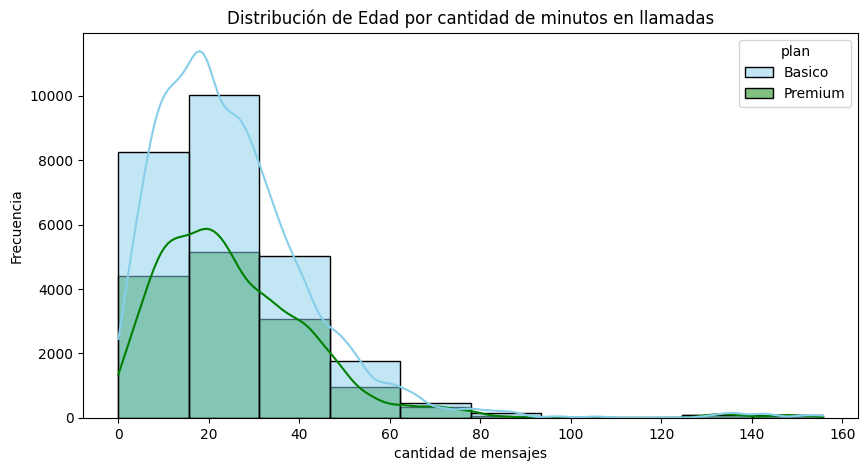

In [39]:
# Histograma para visualizar la cant_minutos_llamada
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración estética general
#sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 5]
palette = ['skyblue', 'green']

#el argumento hue (en Seaborn) separa los datos por tipo de plan y Asigna un color diferente a cada plan
sns.histplot(df_unido, x='cant_minutos_llamada', hue='plan', kde=True, palette=palette, bins=10) 
plt.title('Distribución de Edad por cantidad de minutos en llamadas')
plt.xlabel('cantidad de mensajes')
plt.ylabel('Frecuencia')
plt.show()


💡Insights: 
- ...

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

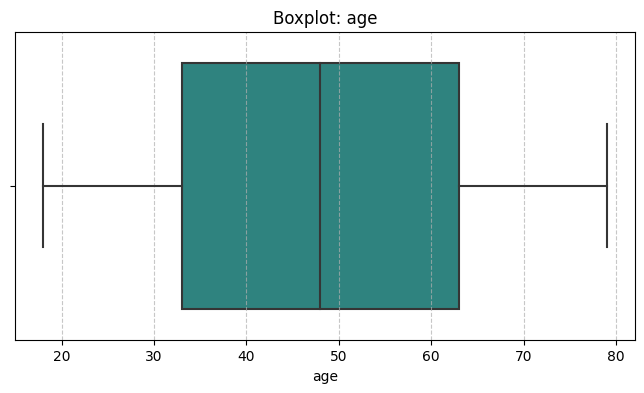

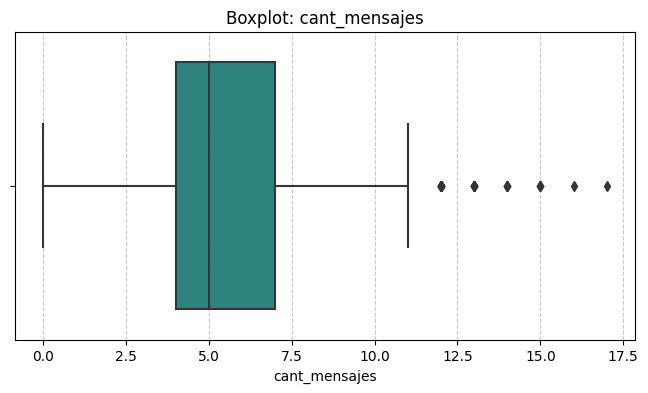

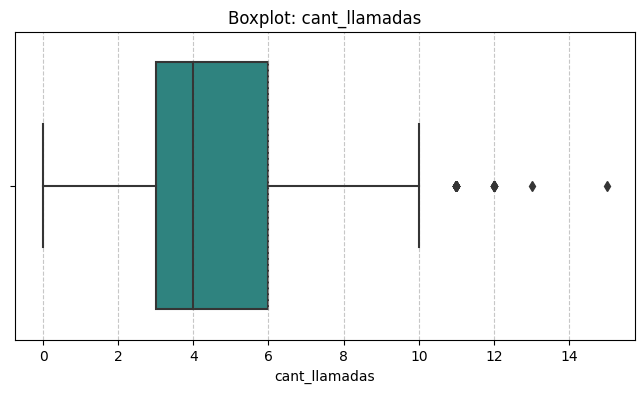

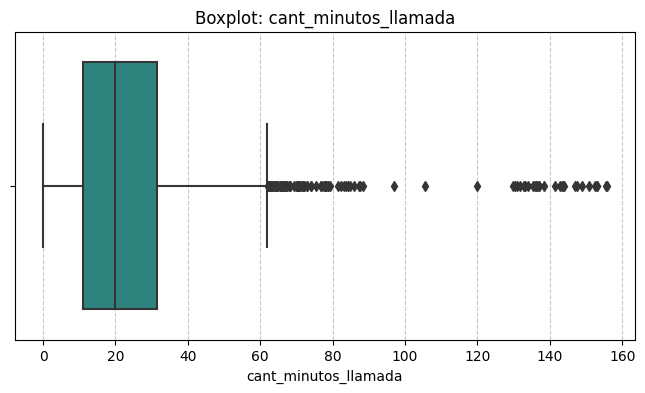

In [40]:
# Visualizando usando BoxPlot 
import seaborn as sns
import matplotlib.pyplot as plt

columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

# Configuración de los gráficos
for col in columnas_numericas:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=user_profile[col], palette='viridis')
    plt.title(f'Boxplot: {col}')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

💡Insights: 
- Age: ...(presenta o no outliers): No presenta outliers. Tendencia Central (Mediana): la línea negra vertical dentro de la caja se sitúa aproximadamente en los 48 años. Esto indica que la mitad de los usuarios analizados tienen 48 años o menos. Rango de Edad Total: los "bigotes" del gráfico muestran que la base de usuarios abarca desde personas de unos 18 años hasta adultos de aproximadamente 79 años.
  
- cant_mensajes: Detección de Outliers (Valores Atípicos): se observan claramente 6 puntos aislados a la derecha del gráfico. Estos representan usuarios con un consumo atípico que va desde los 12 hasta los 17 mensajes. Rango de Normalidad: los "bigotes" del gráfico definen el rango estándar de uso entre 0 y aproximadamente 11 mensajes. Tendencia Central: La mediana se ubica exactamente en los 5 mensajes. Esto indica que el 50% de los usuarios envían 5 mensajes o menos.
  
- cant_llamadas: Detección de Outliers: se identifican claramente 4 puntos aislados a la derecha del gráfico. Estos representan a usuarios que realizan 11, 12, 13 y 15 llamadas. Sesgo a la Derecha: la distribución presenta un sesgo positivo, ya que los valores atípicos se encuentran únicamente en el extremo superior, alejándose de la media hacia la derecha. Tendencia Central: la mediana (la línea negra dentro de la caja) se ubica exactamente en las 4 llamadas. Esto indica que el 50% de los usuarios realizan 4 llamadas o menos.

  
- cant_minutos_llamada: presencia Masiva de Outliers: se observa una gran cantidad de valores atípicos (puntos negros) a partir de los 62 minutos aproximadamente. Estos se extienden de forma continua hasta los 90 minutos y luego de forma más dispersa hasta alcanzar un máximo cercano a los 160 minutos. Mediana: la línea central dentro de la caja se encuentra cerca de los 20 minutos. Esto significa que la mitad de tus usuarios consumen 20 minutos o menos por periodo.

In [41]:
# Calcular límites con el método IQR
columnas_limites = ['cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for cols in columnas_limites:
    Q1 = df_unido[cols].quantile(0.25)
    Q3 = df_unido[cols].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    print('límite inferior de:', cols, '=', limite_inferior)
    print('límite superior de:', cols, '=', limite_superior)


límite inferior de: cant_mensajes = -2.0
límite superior de: cant_mensajes = 14.0
límite inferior de: cant_llamadas = -1.5
límite superior de: cant_llamadas = 10.5
límite inferior de: cant_minutos_llamada = -18.765000000000004
límite superior de: cant_minutos_llamada = 65.75500000000001


In [42]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,4000.000000,4000.000000,4000.000000
mean,5.523000,4.477000,23.311225
std,2.359738,2.145139,18.169564
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,11.107500
50%,5.000000,4.000000,19.780000
75%,7.000000,6.000000,31.412500
max,17.000000,15.000000,155.690000


💡Insights: 
- cant_mensajes: mantener o no outliers, porqué? Mantener porque no representan un error de sistema ni un consumo que ponga en riesgo la red.
  
- cant_llamadas: mantener o no outliers, porqué? Mantener, porque el máximo registrado es de 15.0 llamadas. Al igual que con los mensajes, realizar 15 llamadas en un periodo (probablemente un mes) es un uso normal y esperado. Eliminar estos datos nos haría perder información sobre nuestros clientes más activos sin una justificación técnica de error en el dato.

  
- cant_minutos_llamada: mantener o no outliers, porqué? Evaluar si se mantiene porque aquí la diferencia es más drástica. El límite superior calculado es 65.75, pero el valor máximo llega a 155.69.

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [45]:
# Crear columna grupo_uso
#user_profile['grupo_uso'] = 

user_profile['grupo_uso'] = ''

# Asignar 'Bajo uso' primero
user_profile.loc[(user_profile['cant_llamadas'] < 5) & (user_profile['cant_mensajes'] < 5), 'grupo_uso'] = 'Bajo uso'

# Asignar 'Uso medio' para los que no son bajo uso
user_profile.loc[(user_profile['cant_llamadas'] < 10) & (user_profile['cant_mensajes'] < 10) & (user_profile['grupo_uso'] == ''), 'grupo_uso'] = 'Uso medio'

# Asignar 'Alto uso' para el resto
user_profile.loc[user_profile['grupo_uso'] == '', 'grupo_uso'] = 'Alto uso'

# Verificar
print("Distribución de grupos:")
print(user_profile['grupo_uso'].value_counts())


Distribución de grupos:
Uso medio    2943
Bajo uso      779
Alto uso      278
Name: grupo_uso, dtype: int64


In [46]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio
1,10001,Mateo,Torres,53.0,NaN,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [47]:
# Crear columna grupo_edad
def clasificar_edad(age):
    """
    Clasifica la edad en grupos
    """
    if age < 30:
        return 'Joven'
    elif age < 60:
        return 'Adulto'
    else:
        return 'Adulto Mayor'

# Aplicar la función
user_profile['grupo_edad'] = user_profile['age'].apply(clasificar_edad)

print("Grupos de edad creados:")
print(user_profile['grupo_edad'].value_counts())


Grupos de edad creados:
Adulto          2018
Adulto Mayor    1222
Joven            760
Name: grupo_edad, dtype: int64


In [50]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso,grupo_edad
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio,Adulto
1,10001,Mateo,Torres,53.0,NaN,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso,Adulto
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio,Adulto
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso,Adulto Mayor
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.
  

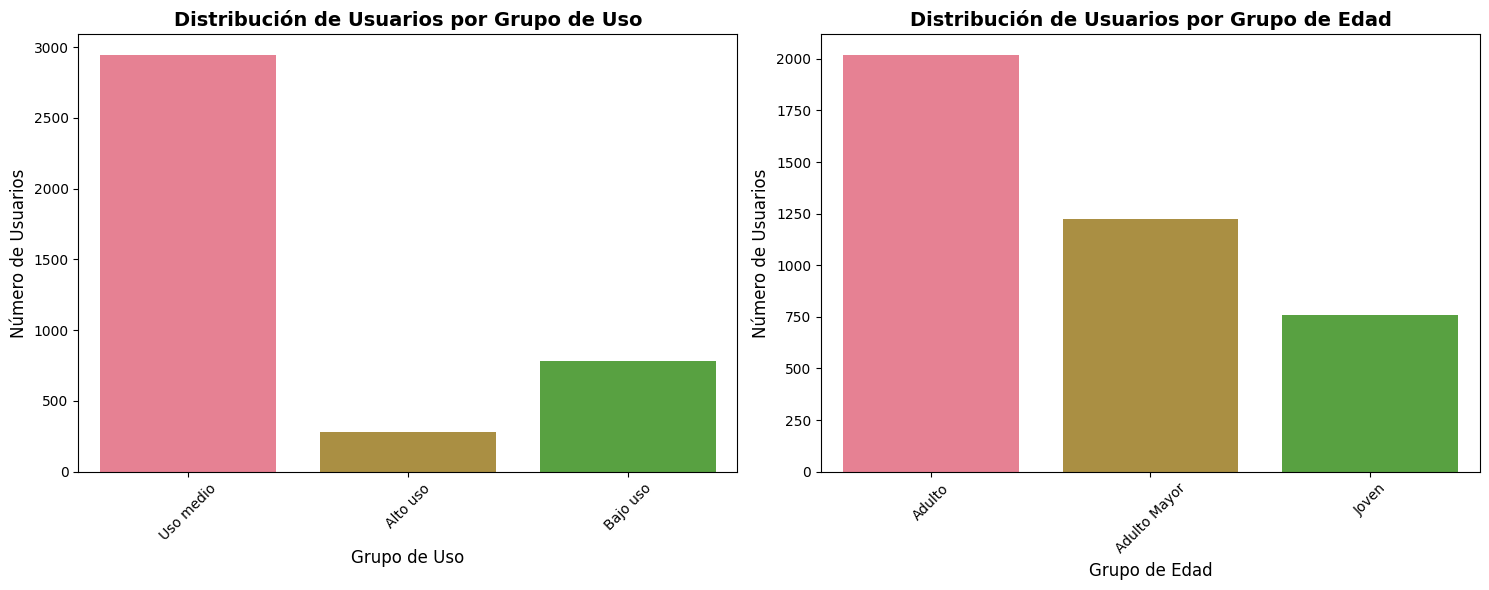

In [51]:
# Visualización de los segmentos por uso
#sns.countplot(...)

import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo
plt.style.use('default')
sns.set_palette("husl")

# Crear figura con subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Distribución por grupo de uso
sns.countplot(data=user_profile, x='grupo_uso', ax=axes[0])
axes[0].set_title('Distribución de Usuarios por Grupo de Uso', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Grupo de Uso', fontsize=12)
axes[0].set_ylabel('Número de Usuarios', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Gráfico 2: Distribución por grupo de edad
sns.countplot(data=user_profile, x='grupo_edad', ax=axes[1])
axes[1].set_title('Distribución de Usuarios por Grupo de Edad', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Grupo de Edad', fontsize=12)
axes[1].set_ylabel('Número de Usuarios', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# Ajustar espaciado
plt.tight_layout()

plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 

- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban? Inchoerencias en las fechas, valores centinela en la edad, información faltante no aleatoria y outliers.


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  - ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?   El segmento dominante es el Adulto (>2,000 usuarios), seguido por Adultos Mayores (aprox. 1,250) y Jóvenes (aprox. 750). El consumo es más estable y predecible en los adultos.

  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué? El segmento más valioso es el de Adultos con Alto Uso. Son usuarios con una capacidad adquisitiva estable que aprovechan al máximo el servicio. Representan el mayor potencial de ingresos recurrentes y son los candidatos ideales para el plan Premium, ya que su volumen de minutos y mensajes justifica una tarifa plana más alta sin riesgo de migración a la competencia por costos excedentes.
 
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio? Un grupo reducido de usuarios consume cantidades masivas de minutos (más allá del límite superior del IQR).


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados? Crear un plan intermedio entre Básico y Premium que ofrezca mensajes ilimitados pero minutos limitado.

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
- Inchoherencias en las fechas.Se detectaron registros de fechas futuras.
- Valores centinela en la edad. La columna de edad contenía el valor -999.
- Información faltante no aleatoria (MAR). Se identificó un patrón de valores nulos sistemáticos en las columnas duration y length: [1.6, 1.8].
- Valores de relleno en city. Se detectó el uso del carácter "?" para representar ciudades desconocidas en lugar de utilizar valores nulos estándar (NaN).
- Outliers. En las métricas de consumo (cant_mensajes, cant_llamadas y cant_minutos_llamada), los datos presentan un fuerte sesgo a la derecha. Existen "heavy users" que consumen significativamente más que el promedio, lo que genera una cola larga en la distribución y afecta la representatividad de la media aritmética. 


🔍 **Segmentos por Edad**
- Los adultos (Líderes de consumo): constituyen el segmento principal con más de 2,000 usuarios. Es el mercado objetivo principal.
- Adultos Mayores: representan un segmento intermedio (aprox. 1,250 usuarios). Tienen una presencia significativa, lo que sugiere que el servicio es accesible y útil para este rango demográfico.
-El grupo de jóvenes: Es el menor (aprox. 750 usuarios). Esto podría indicar una oportunidad de crecimiento o que los canales de captación actuales no están resonando tanto con este público.

📊 **Segmentos por Nivel de Uso**
- Usuarios de Uso Medio: es el grupo más grande con cerca de 3,000 usuarios. Esto indica que la gran mayoría de los clientes tiene un comportamiento equilibrado (entre 5 y 10 llamadas/mensajes).
-Usuarios de Bajo Uso: representan el segundo grupo en tamaño (aprox. 800 usuarios). Son clientes que consumen el servicio de forma esporádica.
-Usuarios de Alto Uso: es el segmento más pequeño (menos de 500 usuarios). Estos son quienes probablemente generan el mayor tráfico o ingresos por excedentes.

💡 **Recomendaciones**
- Crear un plan intermedio entre Básico y Premium que ofrezca mensajes ilimitados pero minutos limitados, enfocado en el segmento detectado que usa mucho texto pero pocas llamadas.
- se recomienda un plan con bonos de datos móviles, ya que su bajo registro en llamadas/mensajes tradicionales sugiere que usan aplicaciones de mensajería (WhatsApp/Telegram).
- 

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`